In [2]:
# Objective: To explore the relationship between various medical and demographic factors among patients
#          : To predict the likelihood of developing diabetes based on patients' medical records

In [1]:
# to import relevant libraries
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv("C:/Users/miche/Desktop/machine_learning/diabetes_prediction_dataset.csv")

In [5]:
# to display variables in dataset
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [6]:
# to check for missing values
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [7]:
# Dataset contains 100,000 patients' data
len(df)

100000

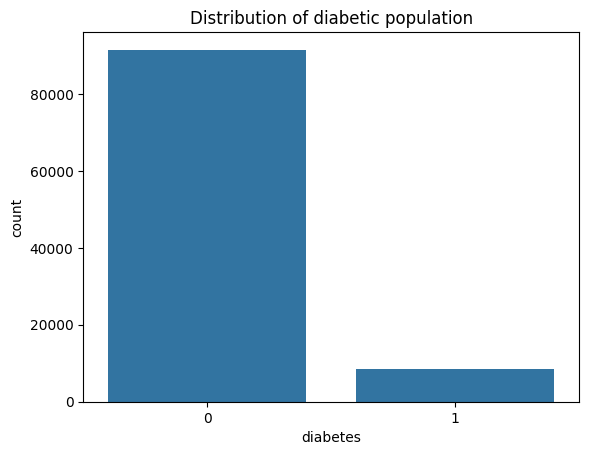

In [8]:
# to see distribution of target variable = 'diabetes'
sns.countplot(data= df, x='diabetes')
plt.title('Distribution of diabetic population');

In [9]:
df['diabetes'].value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

In [10]:
# 8.5% of patients have diabetes
100*(df['diabetes'].value_counts())/len(df)

diabetes
0    91.5
1     8.5
Name: count, dtype: float64

In [11]:
# to print out all variable names
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [13]:
# to separate continuous, categorical and label columns
cat_cols = ['gender','smoking_history']
cont_cols = ['age','hypertension','heart_disease','bmi','HbA1c_level','blood_glucose_level']
y_col = ['diabetes']

In [14]:
# RUN THIS CODE TO COMPARE RESULTS:
print(f'cat_cols  has {len(cat_cols)} columns')
print(f'cont_cols has {len(cont_cols)} columns')
print(f'y_col     has {len(y_col)} column')

cat_cols  has 2 columns
cont_cols has 6 columns
y_col     has 1 column


In [15]:
# to convert categorical columns to category datatypes
for cat in cat_cols:
    df[cat] = df[cat].astype('category')

In [16]:
df.dtypes

gender                 category
age                     float64
hypertension              int64
heart_disease             int64
smoking_history        category
bmi                     float64
HbA1c_level             float64
blood_glucose_level       int64
diabetes                  int64
dtype: object

In [17]:
# to shuffle the dataset
df = shuffle(df, random_state =101)
df.reset_index(drop=True, inplace= True)

In [18]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,37.0,0,0,former,36.31,5.7,100,0
1,Female,12.0,0,0,No Info,27.32,6.2,145,0
2,Female,23.0,0,0,former,37.25,6.0,90,0
3,Male,23.0,0,0,never,27.32,6.0,80,0
4,Female,32.0,0,0,former,22.73,6.0,159,0


In [26]:
# to Set the embedding size
# To create a variable "cat_szs" to hold the number of categories in each variable.
# Then create a variable "emb_szs" to hold the list of (category size, embedding size) tuples.

In [19]:
cat_szs = [len(df[col].cat.categories) for col in cat_cols]
emb_szs = [(size, min(50, (size+1)//2)) for size in cat_szs]
emb_szs

[(3, 2), (6, 3)]

In [28]:
# To create an array of categorical values

In [20]:
sx = df['gender'].cat.codes.values
sh = df['smoking_history'].cat.codes.values

In [21]:
# To create a NumPy array called "cats" that contains a stack of each categorical column .cat.codes.values
cats = np.stack([sx,sh], axis=1)

In [22]:
# to print 1st 5 rows of categorical data
cats[:5]

array([[0, 3],
       [0, 0],
       [0, 3],
       [1, 4],
       [0, 3]], dtype=int8)

In [23]:
# to convert all categorical variables to a tensor of dtype int64
cats = torch.tensor(cats, dtype=torch.int64)

In [24]:
# to create an array of continuous values
conts = np.stack([df[col].values for col in cont_cols], 1)
conts[:5]

array([[ 37.  ,   0.  ,   0.  ,  36.31,   5.7 , 100.  ],
       [ 12.  ,   0.  ,   0.  ,  27.32,   6.2 , 145.  ],
       [ 23.  ,   0.  ,   0.  ,  37.25,   6.  ,  90.  ],
       [ 23.  ,   0.  ,   0.  ,  27.32,   6.  ,  80.  ],
       [ 32.  ,   0.  ,   0.  ,  22.73,   6.  , 159.  ]])

In [25]:
# to convert all continuous data into a tensor of dtype float32
conts = torch.tensor(conts, dtype=torch.float)
conts.dtype

torch.float32

In [26]:
# To create a tensor called "y" from the values in the label column.
# to flatten the tensor so that it can be passed into the CE Loss function.
y = torch.tensor(df[y_col].values).flatten()

In [27]:
y

tensor([0, 0, 0,  ..., 0, 1, 0])

In [40]:
# To create train and test sets from 'cats', 'conts' and y
# We use the entire batch of 30,000 records, but a smaller batch size will save time during training.
# We used a test size of 5,000 records, but you can choose another fixed value or a percentage of the batch size.
# To assign batch and test sizes to simple variables like "b" and "t".

In [28]:
b = 100000 # suggested batch size
t = 10000  # suggested test size

cat_train = cats[:b-t]
cat_test  = cats[b-t:b]
cont_train = conts[:b-t]
cont_test  = conts[b-t:b]
y_train   = y[:b-t]
y_test    = y[b-t:b]

In [29]:
class TabularModel(nn.Module):

    def __init__(self, emb_szs, n_cont, out_sz, layers, p=0.5):
        # Call the parent __init__
        super().__init__()
        
        # Set up the embedding, dropout, and batch normalization layer attributes
        self.embeds = nn.ModuleList([nn.Embedding(ni, nf) for ni,nf in emb_szs])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        
        # Assign a variable to hold a list of layers
        layerlist = []
        
        # Assign a variable to store the number of embedding and continuous layers
        n_emb = sum((nf for ni,nf in emb_szs))
        n_in = n_emb + n_cont
        
        # Iterate through the passed-in "layers" parameter (ie, [200,100]) to build a list of layers
        for i in layers:
            layerlist.append(nn.Linear(n_in,i)) 
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))
        
        # Convert the list of layers into an attribute
        self.layers = nn.Sequential(*layerlist)
    
    def forward(self, x_cat, x_cont):
        # Extract embedding values from the incoming categorical data
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        # Perform an initial dropout on the embeddings
        x = self.emb_drop(x)
        
        # Normalize the incoming continuous data
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        
        # Set up model layers
        x = self.layers(x)
        return x

In [30]:
# to set the random seed
torch.manual_seed(33)

In [31]:
# To create a TabularModel instance
# the model with one hidden layer containing 50 neurons and a dropout layer p-value of 0.4
model = TabularModel(emb_szs, conts.shape[1], 2, [50], p=0.4)
model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(3, 2)
    (1): Embedding(6, 3)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=11, out_features=50, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=50, out_features=2, bias=True)
  )
)

In [45]:
# To define the loss and optimization functions
# Create a loss function called "criterion" using CrossEntropyLoss
# Create an optimization function called "optimizer" using Adam, with a learning rate of 0.001

In [32]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [33]:
# To train the model through 300 epochs
import time
start_time = time.time()

epochs = 300
losses = []

for i in range(epochs):
    i+=1
    y_pred = model(cat_train, cont_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss.detach().numpy())
    
    # a neat trick to save screen space:
    if i%25 == 1:
        print(f'epoch: {i:3}  loss: {loss.item():10.8f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f'epoch: {i:3}  loss: {loss.item():10.8f}') # print the last line
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed

epoch:   1  loss: 0.96803540
epoch:  26  loss: 0.68100637
epoch:  51  loss: 0.57014394
epoch:  76  loss: 0.47924387
epoch: 101  loss: 0.38769075
epoch: 126  loss: 0.30173814
epoch: 151  loss: 0.23612170
epoch: 176  loss: 0.19526161
epoch: 201  loss: 0.16984563
epoch: 226  loss: 0.15348917
epoch: 251  loss: 0.14104924
epoch: 276  loss: 0.13195595
epoch: 300  loss: 0.12622231

Duration: 41 seconds


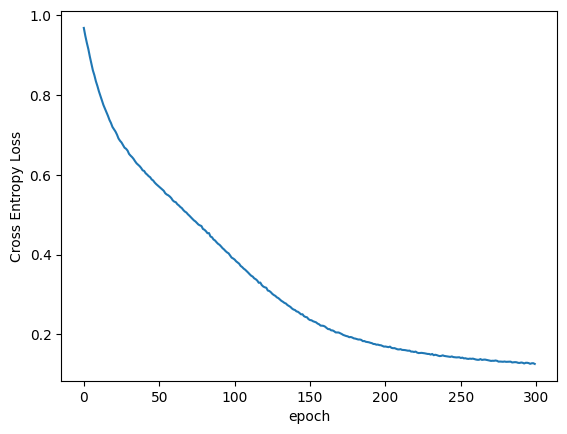

In [34]:
# to plot the cross entropy loss against epochs
plt.plot(range(epochs), losses)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('epoch');

In [49]:
# To evaluate the testing set
# With torch set to no_grad, pass cat_test and con_test through the trained model.
# Create a validation set called "y_val". Compare the output to y_test using the loss function defined above

In [35]:
with torch.no_grad():
    y_val = model(cat_test, cont_test)
    loss = criterion(y_val, y_test)

In [37]:
# the loss function is 0.12, same as epoch = 300
print(f'CE Loss: {loss:.8f}')

CE Loss: 0.12647468


In [52]:
# to calculate the overall accuracy
# Using a for loop, compare the argmax values of the y_val validation set to the y_test set.

In [38]:
rows = len(y_test)
correct = 0

# print(f'{"MODEL OUTPUT":26} ARGMAX  Y_TEST')

for i in range(rows):
    # print(f'{str(y_val[i]):26} {y_val[i].argmax().item():^7}{y_test[i]:^7}')

    if y_val[i].argmax().item() == y_test[i]:
        correct += 1

print(f'\n{correct} out of {rows} = {100*correct/rows:.2f}% correct')


9618 out of 10000 = 96.18% correct


In [39]:
df.dtypes

gender                 category
age                     float64
hypertension              int64
heart_disease             int64
smoking_history        category
bmi                     float64
HbA1c_level             float64
blood_glucose_level       int64
diabetes                  int64
dtype: object

In [40]:
df['age'].describe()

count    100000.000000
mean         41.885856
std          22.516840
min           0.080000
25%          24.000000
50%          43.000000
75%          60.000000
max          80.000000
Name: age, dtype: float64

In [41]:
df['gender'].unique()

['Female', 'Male', 'Other']
Categories (3, object): ['Female', 'Male', 'Other']

In [42]:
df['smoking_history'].unique()

['former', 'No Info', 'never', 'not current', 'ever', 'current']
Categories (6, object): ['No Info', 'current', 'ever', 'former', 'never', 'not current']

In [43]:
df['hypertension'].unique()

array([0, 1], dtype=int64)

In [45]:
df['heart_disease'].unique()

array([0, 1], dtype=int64)

In [46]:
df['bmi'].describe()

count    100000.000000
mean         27.320767
std           6.636783
min          10.010000
25%          23.630000
50%          27.320000
75%          29.580000
max          95.690000
Name: bmi, dtype: float64

In [47]:
df['HbA1c_level'].describe()

count    100000.000000
mean          5.527507
std           1.070672
min           3.500000
25%           4.800000
50%           5.800000
75%           6.200000
max           9.000000
Name: HbA1c_level, dtype: float64

In [48]:
df['blood_glucose_level'].describe()

count    100000.000000
mean        138.058060
std          40.708136
min          80.000000
25%         100.000000
50%         140.000000
75%         159.000000
max         300.000000
Name: blood_glucose_level, dtype: float64

In [54]:
# To feed new data through the trained model
# To write a function that allows the user to input their own values, and generates a prediction.

In [50]:
def test_data(mdl): # pass in the name of the model
    # INPUT NEW DATA
    age = float(input("What is the person's age? (0-80)  ")) # input means its a string variable
    sex = input("What is the person's sex? (Female/Male/Other) ").capitalize()
    sh = input("What is the person's smoking history? ")
    hp = float(input("Is the patient hypertensive? (0-1) ")) # float means it has decimal place or integer
    hd = float(input("Does the patient have heart disease? (0-1) "))
    bmi = float(input("What is patient's bmi? (10-96) "))
    A1c = float(input("What is the patients' HbA1c_reading? (3-9) "))
    bg = float(input("What is patient's blood glucose reading? (80-300) "))

    # PREPROCESS THE DATA
    sex_d = {'Female':0, 'Male':1, 'Other':2}
    sh_d = {'No Info':0, 'never':1, 'former':2, 'not current':3, 'ever':4, 'current':5}
   
    sex = sex_d[sex]
    sh = sh_d[sh]

    # CREATE CAT AND CONT TENSORS
    cats = torch.tensor([sex,sh], dtype=torch.int64).reshape(1,-1)
    conts = torch.tensor([age,hp,hd,A1c,bg,bmi], dtype=torch.float).reshape(1,-1)
    
    # SET MODEL TO EVAL (in case this hasn't been done)
    mdl.eval()

    # PASS NEW DATA THROUGH THE MODEL WITHOUT PERFORMING A BACKPROP
    with torch.no_grad():
        z = mdl(cats, conts).argmax().item()

    print(f'\nThe predicted label is {z}')
    
test_data(model)

What is the person's age? (0-80)   40
What is the person's sex? (Female/Male/Other)  Female
What is the person's smoking history?  ever
Is the patient hypertensive? (0-1)  0
Does the patient have heart disease? (0-1)  1
What is patient's bmi? (10-96)  27
What is the patients' HbA1c_reading? (3-9)  6
What is patient's blood glucose reading? (80-300)  200



The predicted label is 1


In [ ]:
# Patients with the above characters is predicted to be a Diabetic